In [1]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('data/batman.jpg')
print(batman_image.shape)

# Create empty lists of colors to fill
r=[]
g=[]
b=[]

# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [4]:
# Import libraries
import pandas as pd

# Create dataframe of pixel colors
pixels = pd.DataFrame({
    'r':r,
    'b':b,
    'g':g
})
pixels.head()

,r,b,g
0,37,25,27
1,36,19,22
2,48,23,22
3,54,30,30
4,32,22,17


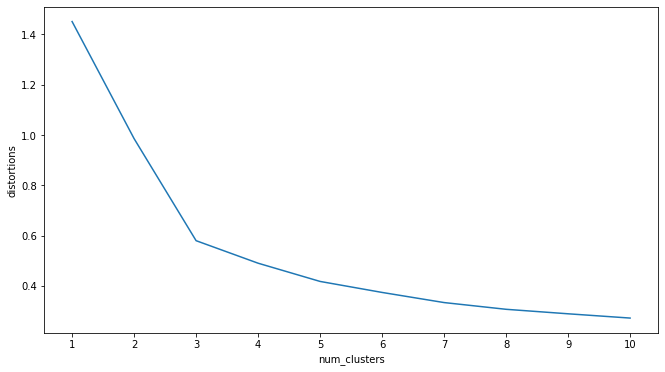

In [9]:
# Import libraries
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import seaborn as sns
import matplotlib.pyplot as plt

# Sclae red, blue, green pixels
pixels['scaled_r'] = whiten(pixels['r'])
pixels['scaled_b'] = whiten(pixels['b'])
pixels['scaled_g'] = whiten(pixels['g'])

# Create empty distortiosn list to fill
distortions = []

# Guessing the clusters to plot over for the elbow plot
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_r','scaled_b','scaled_g']], i)
    distortions.append(distortion)

# Creat a dataframe with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

# Create a figure 
plt.figure(figsize = (11,6))

# Create a line plot of num_clusters and distortions
sns.lineplot(
    x = 'num_clusters',
    y = 'distortions',
    data = elbow_plot
)
plt.xticks(num_clusters)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


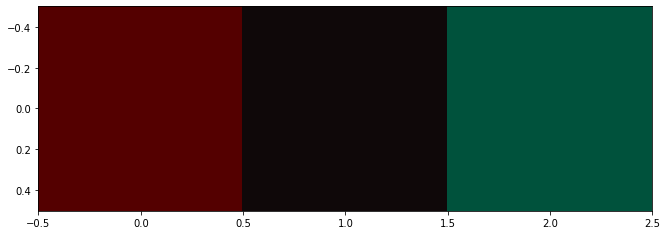

In [17]:
# Get the cluster centers using the optimal number of clusters
cluster_centers, distortion = kmeans(pixels[['scaled_r','scaled_b','scaled_g']], 3)

# Get standard deviations of each color
r_std, b_std, g_std = pixels[['r', 'b', 'g']].std()

# Create an empty list to fill in through for loop
colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Create a figure 
plt.figure(figsize = (11,6))

# Show the color centers
plt.imshow([colors])